# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
#Загрузим необходимые библиотеки
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from scipy import stats as st


In [2]:
#Загрузим датафрейм
try:
    data1 = pd.read_csv('C:/Users/ARTEM/Desktop/Project_DS/Нефть/geo_data_0.csv')
    data2 = pd.read_csv('C:/Users/ARTEM/Desktop/Project_DS/Нефть/geo_data_1.csv')
    data3 = pd.read_csv('C:/Users/ARTEM/Desktop/Project_DS/Нефть/geo_data_2.csv')
except:
    data1=pd.read_csv('/datasets/geo_data_0.csv')
    data2=pd.read_csv('/datasets/geo_data_1.csv')
    data3=pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
#Взглянем на 1 выборку
data1.head(5)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
#Взглянем на вторую выборку
data2.head(5)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
#Взглянем на третью выборку
data3.head(5)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [8]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


### Вывод: 
- загрузили необходимые библиотеки
- визуально ознакомились с данными

## Обучение и проверка модели

In [9]:
#Разобьем данные на обучающую и валидационную выборки в соотношении 75:25
data_train1, data_valid1 = train_test_split(data1, test_size=0.25, random_state=12345)
data_train2, data_valid2 = train_test_split(data2, test_size=0.25, random_state=12345)
data_train3, data_valid3 = train_test_split(data3, test_size=0.25, random_state=12345)
print('Размер обучающей выборки для 1 региона -', len(data_train1),';валидационной выборки для 1 региона -', len(data_valid1))
print('Размер обучающей выборки для 2 региона -', len(data_train2),';валидационной выборки для 2 региона -', len(data_valid2))
print('Размер обучающей выборки для 3 региона -', len(data_train3),';валидационной выборки для 3 региона -', len(data_valid3))

Размер обучающей выборки для 1 региона - 75000 ;валидационной выборки для 1 региона - 25000
Размер обучающей выборки для 2 региона - 75000 ;валидационной выборки для 2 региона - 25000
Размер обучающей выборки для 3 региона - 75000 ;валидационной выборки для 3 региона - 25000


In [10]:
#Определим целевой признак и признаки для каждого региона, также нужно удалить id, потому что он не несет какой-то смысловой нагрузки и вылетает ошибка при обучении модели
target_train1=data_train1['product']
features_train1=data_train1.drop(['product','id'], axis=1)
target_valid1=data_valid1['product']
features_valid1=data_valid1.drop(['product','id'], axis=1)


target_train2=data_train2['product']
features_train2=data_train2.drop(['product','id'], axis=1)
target_valid2=data_valid2['product']
features_valid2=data_valid2.drop(['product','id'], axis=1)

target_train3=data_train3['product']
features_train3=data_train3.drop(['product','id'], axis=1)
target_valid3=data_valid3['product']
features_valid3=data_valid3.drop(['product','id'], axis=1)

In [11]:
#Применим модель линейной регрессии к нашим 3 регионам
model1=LinearRegression()
model1.fit(features_train1,target_train1)
predict1=model1.predict(features_valid1)
rmse1 = mean_squared_error(target_valid1, predict1)**0.5
print('Среднеквадратичная ошибка RMSE: %.2f'% rmse1)
print('Коэффициент детерминации: %.2f' % r2_score(target_valid1, predict1))



Среднеквадратичная ошибка RMSE: 37.58
Коэффициент детерминации: 0.28


In [12]:
model2=LinearRegression()
model2.fit(features_train2,target_train2)
predict2=model2.predict(features_valid2)
rmse2 = mean_squared_error(target_valid2, predict2)**0.5
print('Среднеквадратичная ошибка RMSE: %.2f'% rmse2)
print('Коэффициент детерминации: %.2f' % r2_score(target_valid2, predict2))

Среднеквадратичная ошибка RMSE: 0.89
Коэффициент детерминации: 1.00


In [13]:
model3=LinearRegression()
model3.fit(features_train3,target_train3)
predict3=model3.predict(features_valid3)
rmse3 = mean_squared_error(target_valid3, predict3)**0.5
print('Среднеквадратичная ошибка RMSE: %.2f'% rmse3)
print('Коэффициент детерминации: %.2f' % r2_score(target_valid3, predict3))

Среднеквадратичная ошибка RMSE: 40.03
Коэффициент детерминации: 0.21


In [14]:
result_table = pd.DataFrame(index=['RMSE модели','R2 Score', 'Средний запас предсказанного сырья ','Средний запас фактического сырья','Разница'], columns=['Для 1 региона','Для 2 региона','Для 3 региона'])
result_table['Для 1 региона'] = rmse1,r2_score(target_valid1, predict1),predict1.mean(),data1['product'].mean(),(predict1.mean()-data1['product'].mean())/data1['product'].mean()*100
result_table['Для 2 региона'] = rmse2,r2_score(target_valid2, predict2),predict2.mean(),data2['product'].mean(),(predict2.mean()-data2['product'].mean())/data2['product'].mean()*100
result_table['Для 3 региона'] = rmse3,r2_score(target_valid3, predict3),predict3.mean(),data3['product'].mean(),(predict3.mean()-data3['product'].mean())/data3['product'].mean()*100


In [15]:
result_table

,Для 1 региона,Для 2 региона,Для 3 региона
RMSE модели,37.579422,0.893099,40.029709
R2 Score,0.279943,0.999623,0.205248
Средний запас предсказанного сырья,92.592568,68.728547,94.965046
Средний запас фактического сырья,92.500000,68.825000,95.000000
Разница,0.100073,-0.140143,-0.036794


### Вывод: 
- Самые высокие  фактические запасы сырья, как и предсказанные в 1 и 3 регионе, они примерно одинаковые 92-95, однако модели имеют высокую погрешность
- Во 2 регионе средние запасы нефти ниже, чем в 1 и 3, НО и погрешность значительно ниже

## Подготовка к расчёту прибыли

In [16]:
# Необходимые переменные
BUDGET= 1000000000
INCOME_1_POINT=45000
BEST_POINTS = 200
BUDGET_PER_POINT=BUDGET/BEST_POINTS
PRICE_PER_BARREL=450000

In [17]:
#Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины
v_for_new_point = BUDGET_PER_POINT/INCOME_1_POINT
print('Объём каждой скважины для безубыточной разработки должен составлять не менее: %.2f'%v_for_new_point,'тыс.баррелей')

Объём каждой скважины для безубыточной разработки должен составлять не менее: 111.11 тыс.баррелей


In [18]:
#Выделим средние объем в 1 регионе
data1['product'].mean()

92.49999999999974

In [19]:
#Выделим средние объем во 2 регионе
data2['product'].mean()

68.82500000002561

In [20]:
#Выделим средние объем в 3 регионе
data3['product'].mean()

95.00000000000041

In [21]:
#Сделаем результирующие таблицу и посчиатем среднее
result_table = pd.DataFrame(index=['Cредний объем на скважину 1 регион','Необходимый объем'], columns=['Для 1 региона','Для 2 региона','Для 3 региона'])
result_table['Для 1 региона'] = data1['product'].mean(),v_for_new_point
result_table['Для 2 региона'] = data2['product'].mean(),v_for_new_point
result_table['Для 3 региона'] = data3['product'].mean(),v_for_new_point


In [22]:
#Оценим результаты
result_table

,Для 1 региона,Для 2 региона,Для 3 региона
Cредний объем на скважину 1 регион,92.500000,68.825000,95.000000
Необходимый объем,111.111111,111.111111,111.111111


### Вывод: 

Средние объемы во всех 3 регионах меньше объема, необходимого для безубыточной разработки, поэтому мы не можем сразу сделать 


In [23]:
#Выполним привязку индексов скважин к предсказаниям модели и отсорируем список по убыванию
probs200 = pd.Series(predict1, index=target_valid1.index).sort_values(ascending=False)
top200 = probs200[:200]
top200

93073    180.180713
46784    176.252213
78948    175.850623
43388    175.658429
6496     173.299686
            ...    
30488    148.507064
98799    148.481767
53840    148.476498
4638     148.436761
75908    148.365941
Length: 200, dtype: float64

In [24]:
#Посчитаем сумму
top200_sum = top200.sum()
print('Суммарный запас сырья в 200 лучших скважинах составит: %.2f тыс.баррелей'%top200_sum)

Суммарный запас сырья в 200 лучших скважинах составит: 31102.33 тыс.баррелей


In [31]:
#Напишем функцию для расчета прибыли
def profit_for_per_region(predict,target,count):
    probs200= pd.Series(predict, index=target.index).sort_values(ascending=False)
    top200  = probs200[:count].sum()
    profit_pred=(top200*INCOME_1_POINT)-BUDGET
    print('Суммарный запас сырья в 200 лучших скважинах составит: %.2f тыс.баррелей'%top200)
    print('Прибыль для полученного объёма сырья составит %.2f рублей'%(profit_pred))

In [32]:
#Для 1 региона
profit_for_per_region(predict1,target_valid1,200)

Суммарный запас сырья в 200 лучших скважинах составит: 31102.33 тыс.баррелей
Прибыль для полученного объёма сырья составит 399604887.75 рублей


In [33]:
#Для 2 региона
profit_for_per_region(predict2,target_valid2,200)

Суммарный запас сырья в 200 лучших скважинах составит: 27746.03 тыс.баррелей
Прибыль для полученного объёма сырья составит 248571205.20 рублей


In [34]:
#Для 3 региона
profit_for_per_region(predict3,target_valid3,200)

Суммарный запас сырья в 200 лучших скважинах составит: 29603.90 тыс.баррелей
Прибыль для полученного объёма сырья составит 332175439.62 рублей


### Вывод: 
Все регионы выглядят достаточно прибыльными, 1 регион выглядит предпочтительнее всех на данный момент, как по объему нефти так и по прибыли

## Расчёт прибыли и рисков 

In [38]:
#Скорректируем функцию
def profit_for_per_region(predict,target,count):
    probs200 = pd.Series(predict).sort_values(ascending=False)
    top200  = target[probs200.index][:count]
    product = top200.sum()
    income = product * INCOME_1_POINT
    return income  - BUDGET

In [39]:
#Применим бустрап
state = np.random.RandomState(12345)
n=500
k=1000
def bootstap(target,predict):
    values = []
    predict_1 = pd.Series(predict, index=target.index)
    count=0
    for i in range(k):
        target_subsample = target.sample(n,replace=True, random_state=state)  
        probs_subsample = predict_1[target_subsample.index]
        values.append(profit_for_per_region(probs_subsample,target_subsample, BEST_POINTS))  
    for i in values:
        if i < 0:
            count +=1
            
    values = pd.Series(values)
    mean = values.mean()
    interval = st.t.interval(0.95, len(values)-1, values.mean(), values.sem())
        
    
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    
    risk=(values < 0).mean()
    
    print("Средняя прибыль: {:.2f} руб".format(mean))
    print('С вероятностью 95% прибыль в данном регионе будет составлять от: {:.2f} руб до: {:.2f} руб'.format((lower),(upper)))
    print("95%-ый доверительный интервал: от {:.2f} руб до {:.2f} руб". format((interval[0]),(interval[1])))
    print ('Процент вероятности убытка в данном регионе составит {:.1%}', format(count/k))

In [40]:
#Результаты 1 региона
bootstap(target_valid1,predict1)

Средняя прибыль: 42593852.69 руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -10209009.48 руб до: 94797635.34 руб
95%-ый доверительный интервал: от 40873220.71 руб до 44314484.68 руб
Процент вероятности убытка в данном регионе составит {:.1%} 0.06


In [41]:
#Результаты 2 региона
bootstap(target_valid2,predict2)

Средняя прибыль: 51825949.37 руб
С вероятностью 95% прибыль в данном регионе будет составлять от: 12812323.14 руб до: 95361298.21 руб
95%-ый доверительный интервал: от 50524988.16 руб до 53126910.58 руб
Процент вероятности убытка в данном регионе составит {:.1%} 0.003


In [42]:
#Результаты 3 региона
bootstap(target_valid3,predict3)

Средняя прибыль: 42019400.53 руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -11585260.92 руб до: 98962993.98 руб
95%-ый доверительный интервал: от 40252870.37 руб до 43785930.70 руб
Процент вероятности убытка в данном регионе составит {:.1%} 0.062


+------------------------+-------------------+
|       Показатель       |      Значение     |
+------------------------+-------------------+
|    Средняя выручка     |     430.3 млн     |
|          Риск          |        4.9%       |
| Доверительный интервал | -93.6 : 974.2 млн |
+------------------------+-------------------+


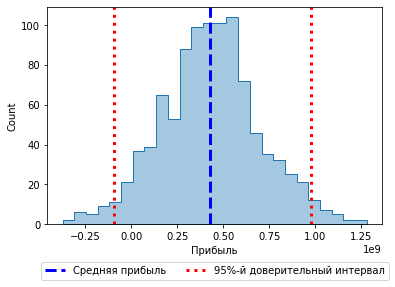

In [45]:
#pip3 install prettytable
from prettytable import PrettyTable
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt

BUDGET = 10000000000
BARREL_COST = 450
BARRELS_IN_UNIT = 1000
UNIT_COST = BARREL_COST * BARRELS_IN_UNIT
TOTAL_POINTS = 500
POINTS = 200

def revenue_2(target, predictions, points, budget, unit_cost):
    predicted_sorted = predictions.sort_values(ascending=False)
    selected = target[predicted_sorted.index][:points]
    return selected.sum() * unit_cost - budget

def bootstrap_2(target, probabilities):
    state = np.random.RandomState(888)
    values=[]
    for i in range(1000):
        target_subsample = target.sample(replace=True,\
            random_state=state, n=TOTAL_POINTS)
        
        probs_subsample = probabilities[target_subsample.index]
        values.append(revenue_2(target_subsample, probs_subsample, POINTS, BUDGET, UNIT_COST))

    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean = values.mean()
    risk = st.percentileofscore(values, 0)
     
     # Отображение таблицы
    table = PrettyTable()
    table.field_names = ['Показатель', 'Значение']    
    table.add_row(['Средняя выручка', f'{mean/1e6:.1f} млн'])
    table.add_row(['Риск', f'{risk:.2}%'])    
    table.add_row(['Доверительный интервал', f'{lower/1e6:.1f} : {upper/1e6:.1f} млн'])
    print(table)

    sns.histplot(values, alpha=0.4,  element="step")
    plt.xlabel('Прибыль')
    plt.axvline(x=mean, color='b', ls='--', lw=3, label='Средняя прибыль')
    plt.axvline(x=lower, color='r', ls=':', lw=3, label='95%-й доверительный интервал')
    plt.axvline(x=upper, color='r', ls=':', lw=3)
    plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)
    plt.show()
    
bootstrap_2(target_valid3.reset_index(drop=True), pd.Series(predict3))

### Вывод: 
Средняя прибыль в регионе 2 по прогнозам выглядит наиболее высокой, далее регион 1 и регион 3